# ASTU assignment on PCA
1.The dataset given for this problem consists of data extracted from satellite images. The number of features is 36.

2.Reduce the dimensionality of the dataset using PCA. The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01.

3.Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding.

## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
dataset = pd.read_csv(r"F:\Ekovation\Mathematical Preliminaries\assignment\PCA_practice_dataset.csv", header=None)

In [3]:
dataset.shape

(8042, 35)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031250,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.125000,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.187500,0.495146,0.515789
1,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
2,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
3,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
4,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8038,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8039,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8040,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [5]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031250,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.125000,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.187500,0.495146,0.515789
1,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
2,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
3,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
4,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8038,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8039,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8040,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [6]:
dataset.shape

(8042, 35)

## Covariance matrix of data

In [7]:
cov = np.cov(dataset)

In [8]:
cov.shape

(8042, 8042)

## Eigenvalues and Eigenvectors of covariance matrix

In [9]:
eig_val, eig_vec = np.linalg.eig(cov)

In [42]:
print("Eigen values for this dataset is \n{}\n".format(eig_val)) ## Print these eigen values 
print("Corresponding eigen-vectors are \n{}".format(eig_vec))

Eigen values for this dataset is 
[7.06248941e+02+0.00000000e+00j 1.08699068e+02+0.00000000e+00j
 3.29068375e+01+0.00000000e+00j ... 8.17588688e-21+1.44397738e-18j
 8.17588688e-21-1.44397738e-18j 1.48953605e-18+0.00000000e+00j]

Corresponding eigen-vectors are 
[[-5.51699297e-04+0.00000000e+00j  2.46822394e-02+0.00000000e+00j
  -4.01313716e-05+0.00000000e+00j ...  3.91456684e-04+1.17435810e-04j
   3.91456684e-04-1.17435810e-04j -5.86434142e-04+0.00000000e+00j]
 [-1.12005537e-03+0.00000000e+00j  2.03097709e-02+0.00000000e+00j
   5.16728885e-03+0.00000000e+00j ...  1.24906707e-05+1.91918775e-06j
   1.24906707e-05-1.91918775e-06j -8.98107989e-06+0.00000000e+00j]
 [-2.16762510e-03+0.00000000e+00j  2.31265216e-02+0.00000000e+00j
  -2.58232555e-03+0.00000000e+00j ...  7.67864229e-06-4.42171660e-06j
   7.67864229e-06+4.42171660e-06j -1.25381116e-05+0.00000000e+00j]
 ...
 [-6.59963699e-03+0.00000000e+00j  2.00394418e-03+0.00000000e+00j
  -7.07805423e-03+0.00000000e+00j ... -1.21050943e-03-1.96

In [40]:
eig_val

array([7.06248941e+02+0.00000000e+00j, 1.08699068e+02+0.00000000e+00j,
       3.29068375e+01+0.00000000e+00j, ...,
       8.17588688e-21+1.44397738e-18j, 8.17588688e-21-1.44397738e-18j,
       1.48953605e-18+0.00000000e+00j])

In [41]:
eig_vec

array([[-5.51699297e-04+0.00000000e+00j,  2.46822394e-02+0.00000000e+00j,
        -4.01313716e-05+0.00000000e+00j, ...,
         3.91456684e-04+1.17435810e-04j,  3.91456684e-04-1.17435810e-04j,
        -5.86434142e-04+0.00000000e+00j],
       [-1.12005537e-03+0.00000000e+00j,  2.03097709e-02+0.00000000e+00j,
         5.16728885e-03+0.00000000e+00j, ...,
         1.24906707e-05+1.91918775e-06j,  1.24906707e-05-1.91918775e-06j,
        -8.98107989e-06+0.00000000e+00j],
       [-2.16762510e-03+0.00000000e+00j,  2.31265216e-02+0.00000000e+00j,
        -2.58232555e-03+0.00000000e+00j, ...,
         7.67864229e-06-4.42171660e-06j,  7.67864229e-06+4.42171660e-06j,
        -1.25381116e-05+0.00000000e+00j],
       ...,
       [-6.59963699e-03+0.00000000e+00j,  2.00394418e-03+0.00000000e+00j,
        -7.07805423e-03+0.00000000e+00j, ...,
        -1.21050943e-03-1.96449082e-03j, -1.21050943e-03+1.96449082e-03j,
        -1.75863780e-03+0.00000000e+00j],
       [-6.64867385e-03+0.00000000e+00j,  4.

In [10]:
eig_val.shape

(8042,)

In [13]:
eig_vec_ls = []
for i in range(eig_vec.shape[1]):
    e = np.matrix(dataset).T@eig_vec[:,i]
    e = e/eig_val[i]
    eig_vec_ls.append(np.ravel(e))

## Finding the Principal Components

In [32]:
sort_index = np.argsort(eig_val)
t_val = np.arange(0.9,0.98,0.01)
t_val = t_val.round(2)
sort_index = sort_index[::-1]
eig_val_sum = np.sum(eig_val)
temp_sum=0
prin_eig_val=[]
prin_eig_vec=[]
t=0.9
i=0
prin_comp=[]
while t<0.98:
    while temp_sum<t*eig_val_sum :
        prin_eig_val.append(eig_val[sort_index[i]])
        prin_eig_vec.append(eig_vec_ls[sort_index[i]])
        temp_sum += eig_val[sort_index[i]]
        i += 1
    prin_comp.append(i)
    t+=0.01


In [33]:
prin_comp

[4, 5, 5, 6, 6, 7, 7, 9]

In [34]:
for j in range(len(t_val)):
            print("Number of principal component retained at threshold {} is: {}".format(t_val[j],prin_comp[j]))

Number of principal component retained at threshold 0.9 is: 4
Number of principal component retained at threshold 0.91 is: 5
Number of principal component retained at threshold 0.92 is: 5
Number of principal component retained at threshold 0.93 is: 6
Number of principal component retained at threshold 0.94 is: 6
Number of principal component retained at threshold 0.95 is: 7
Number of principal component retained at threshold 0.96 is: 7
Number of principal component retained at threshold 0.97 is: 9


## Scree Plot

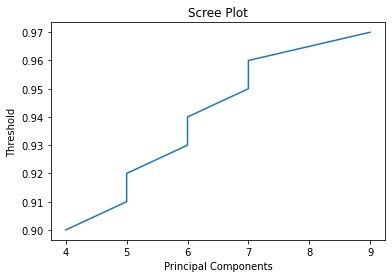

In [39]:
plt.plot(prin_comp, t_val)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Threshold")
plt.show()